In [9]:
from keras.datasets import imdb
import numpy as np


In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
# decoding back to english 
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [32]:
############################################################
## vectorize the data - in this case use one hot encoding ##
############################################################
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# one hot encode all x's
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# and all the ys
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [33]:
#############################################################
## time to build a neural network - dense, fully connected ##
#############################################################

# input data is vectors and the labels are binary
# use dense with relu activations

# two hidden layers - 16 hidden units each - using relu activation
# final layer with output of a binary scalar - using a sigmoid activation function to output between 0/1

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [34]:
# set a loss function
# because we are doing binary classification and output of network is a probability
# (ie: network ends with single unit sigmoid activation) we will use binary_crossentropy

# compile the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [35]:
### customizing the optimizer, losses, metrics
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [36]:
# actual model compile we want to use
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# Validating

# split out some validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# train for 20 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.5276 - acc: 0.7888 - val_loss: 0.4409 - val_acc: 0.8278
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3244 - acc: 0.8978 - val_loss: 0.3175 - val_acc: 0.8780
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2312 - acc: 0.9254 - val_loss: 0.2809 - val_acc: 0.8900
Epoch 4/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1799 - acc: 0.9398 - val_loss: 0.2851 - val_acc: 0.8845
Epoch 5/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1471 - acc: 0.9538 - val_loss: 0.2879 - val_acc: 0.8838
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1205 - acc: 0.9620 - val_loss: 0.2890 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.0987 - acc: 0.9715 - val_loss: 0.3055 - val_ac

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

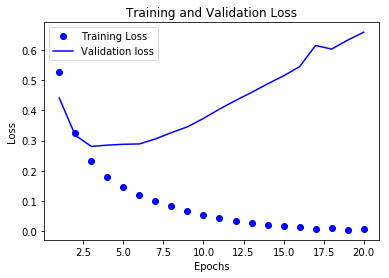

In [38]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) +1)

plt.plot(epochs, loss_values, 'bo', label ='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

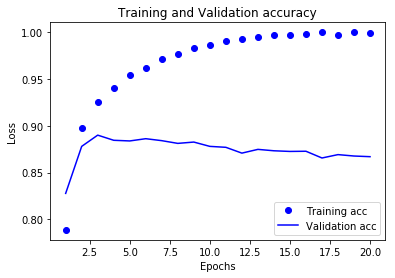

In [39]:
plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [42]:
# note that the training loss and accuracy improve pretty much with each epoch - but the validation loss/accuracy 
# actually peaks at iteration 4 - this is showing us overfitting

# let's train a new model - this timeonly 4 epochs

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# actual model compile we want to use
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
# Validating

# split out some validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# train for 20 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 102us/step - loss: 0.5847 - acc: 0.7081 - val_loss: 0.4995 - val_acc: 0.7947
Epoch 2/4
15000/15000 [==============================] - 1s 92us/step - loss: 0.4179 - acc: 0.8817 - val_loss: 0.3788 - val_acc: 0.8785
Epoch 3/4
15000/15000 [==============================] - 1s 92us/step - loss: 0.2873 - acc: 0.9233 - val_loss: 0.3172 - val_acc: 0.8831
Epoch 4/4
25000/25000 [==============================] - 2s 68us/step


[0.3115688149929047, 0.87768]

In [43]:
# now let's predict using our trained model

model.predict(x_test)

array([[0.293179  ],
       [0.99991536],
       [0.9819484 ],
       ...,
       [0.18942809],
       [0.26151368],
       [0.60903883]], dtype=float32)